# Job Posting Fraudulent Detection
- Loay Hassan Ali                41910176
- Mohamed Alaa Mohamed           41910232
- Mohamed Kamal Ahmed            41910086
- Abdelrahman Nasser Abdelrahman 41910213

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.layers import Embedding,  Bidirectional
from keras_preprocessing.sequence import pad_sequences

# Dataset Analysis

In [44]:
df = pd.read_csv("fake_job_postings.csv", encoding= "UTF-8")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [46]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [48]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [49]:
df['title'].value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [50]:
df['title'] = df['title'].str.strip()

In [51]:
df['title'].value_counts()

English Teacher Abroad                                         406
Customer Service Associate                                     198
Graduates: English Teacher Abroad (Conversational)             144
Customer Service Associate - Part Time                          91
Software Engineer                                               90
                                                              ... 
Sales Executive - Office Equipment                               1
QA/QC Leader - Cured Meats Co - Chicagoland                      1
Application Developer/SQL Server                                 1
Training Assistant                                               1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64

In [52]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3105, dtype: int64

In [53]:
df['department'].value_counts()

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64

In [54]:
df['salary_range'].value_counts()

0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: salary_range, Length: 874, dtype: int64

In [55]:
df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [56]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [57]:
df['required_experience'].value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [58]:
df['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [59]:
df['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

# Data Visualization

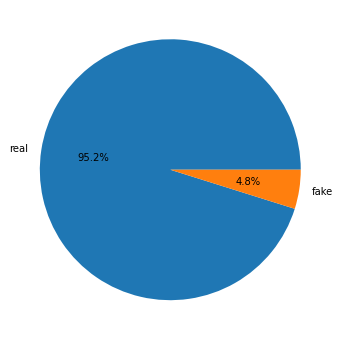

In [63]:
fig = plt.figure(figsize=(20,6))
fig.set_facecolor('white')
plt.pie(df['fraudulent'].value_counts(),labels=['real', 'fake'], autopct='%1.1f%%');

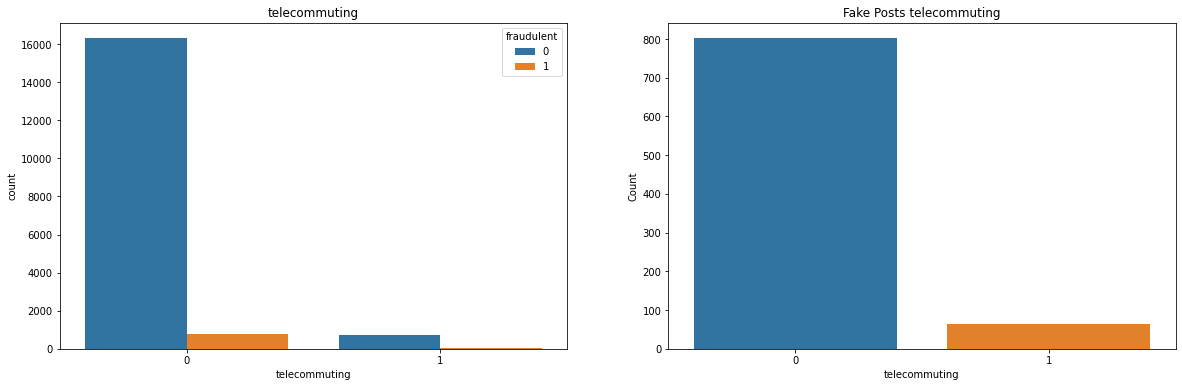

In [76]:
telecommuting1 = df['telecommuting'][df['fraudulent'] == 1].value_counts()
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='telecommuting', hue='fraudulent', data = df)
plt.title("telecommuting")

fig.add_subplot(1,2,2)
sns.barplot(x = telecommuting1.index, y = telecommuting1)
plt.xlabel("telecommuting")
plt.ylabel("Count")
plt.title("Fake Posts telecommuting");

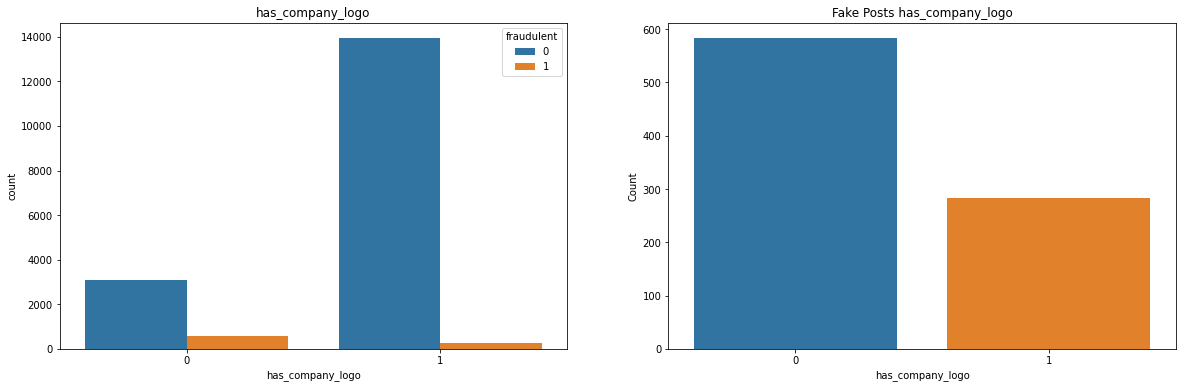

In [73]:
has_logo1 = df['has_company_logo'][df['fraudulent'] == 1].value_counts()
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='has_company_logo', hue='fraudulent', data = df)
plt.title("has_company_logo")

fig.add_subplot(1,2,2)
sns.barplot(x = has_logo1.index, y = has_logo1)
plt.xlabel("has_company_logo")
plt.ylabel("Count")
plt.title("Fake Posts has_company_logo");

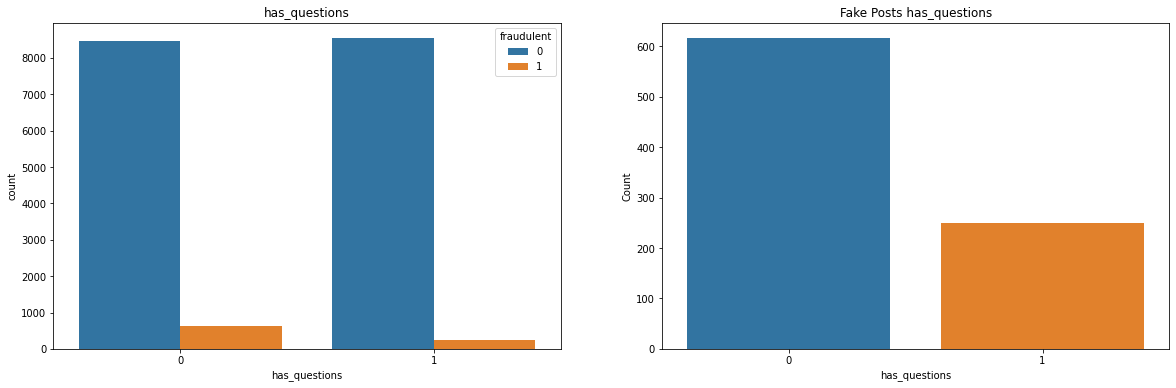

In [74]:
has_questions1 = df['has_questions'][df['fraudulent'] == 1].value_counts()
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='has_questions', hue='fraudulent', data = df)
plt.title("has_questions")

fig.add_subplot(1,2,2)
sns.barplot(x = has_questions1.index, y = has_questions1)
plt.xlabel("has_questions")
plt.ylabel("Count")
plt.title("Fake Posts has_questions");

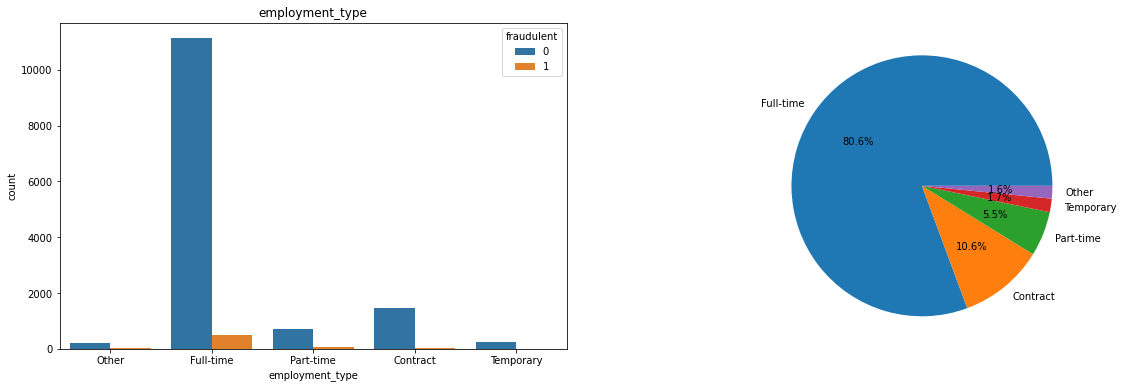

In [79]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='employment_type', hue='fraudulent', data = df)
plt.title("employment_type")

fig.add_subplot(1,2,2)
plt.pie(df['employment_type'].value_counts(),labels=df['employment_type'].value_counts().index, autopct='%1.1f%%');

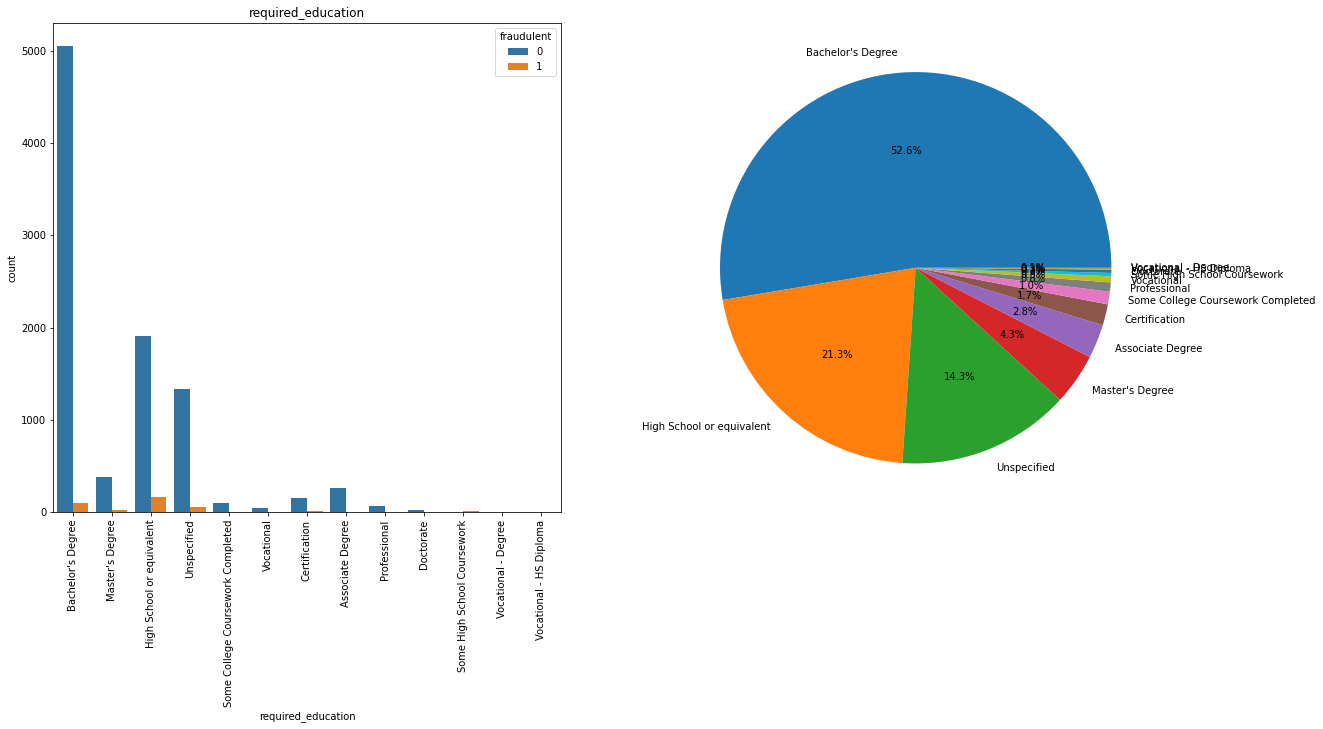

In [85]:
fig = plt.figure(figsize=(20,9))
fig.add_subplot(1,2,1)
sns.countplot(x='required_education', hue='fraudulent', data = df)
plt.xticks(rotation = 90)
plt.title("required_education")

fig.add_subplot(1,2,2)
plt.pie(df['required_education'].value_counts(),labels=df['required_education'].value_counts().index, autopct='%1.1f%%');

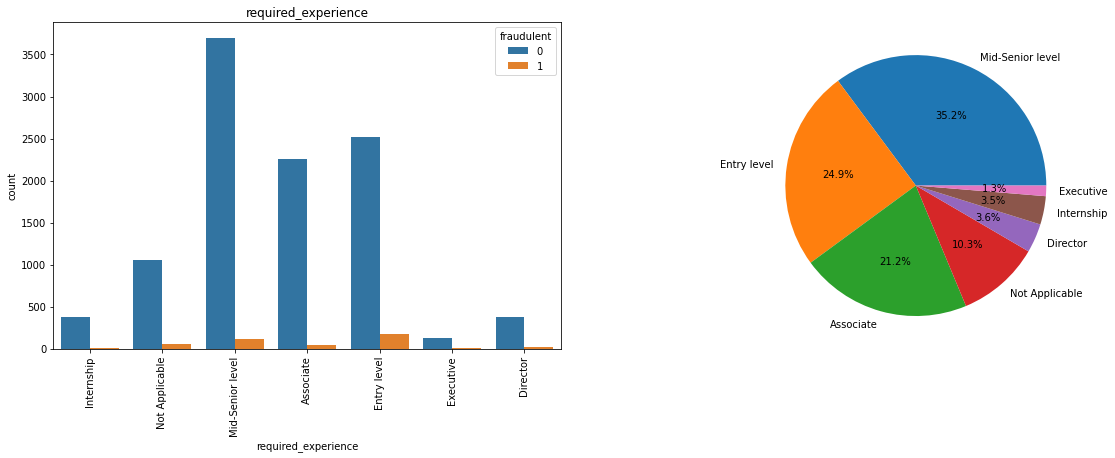

In [82]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='required_experience', hue='fraudulent', data = df)
plt.xticks(rotation = 90)
plt.title("required_experience")

fig.add_subplot(1,2,2)
plt.pie(df['required_experience'].value_counts(),labels=df['required_experience'].value_counts().index, autopct='%1.1f%%');

In [92]:
df_numer = df.drop(columns = ['job_id','title','location','department','salary_range','company_profile'
                                ,'description','requirements','benefits','employment_type',
                                'required_experience','required_education','industry','function'])
df_numer.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


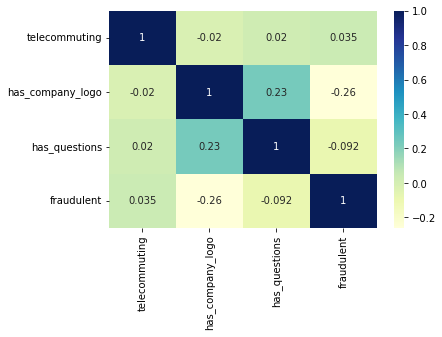

In [96]:
# Plotting correlation for numerical features
dataplot = sns.heatmap(df_numer.corr(), cmap="YlGnBu", annot=True)
plt.show()

Feature telecommuting: 0.03191334934271062
Feature has_company_logo: 0.13492748160552992
Feature has_questions: 0.014132430754074221


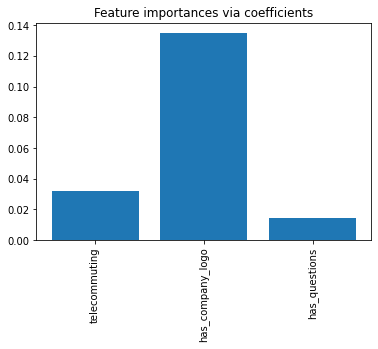

In [99]:
x = df_numer.iloc[:, :-1]
y = df_numer.iloc[:, -1]
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(x.columns)

# Print the coeff of each feature
for i, score in enumerate(importance):
    print(f'Feature {feature_names[i]}: {score}')

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

# Data Preprocessing

In [101]:
df.fillna(" ", inplace = True)
# Grouping all text features together
df['text'] = df['title'] + " " + df['department'] + \
             " " + df['company_profile'] + " " + \
             df['description'] + " " + \
             df['requirements'] + " " +\
             df['benefits'] + " " +\
             df['function'] + " " +\
             df['required_experience']+ " "+\
             df["required_education"]+ " " +\
             df["industry"]
df['text'].head(10)

0    Marketing Intern Marketing We're Food52, and w...
1    Customer Service - Cloud Video Production Succ...
2    Commissioning Machinery Assistant (CMA)   Valo...
3    Account Executive - Washington DC Sales Our pa...
4    Bill Review Manager   SpotSource Solutions LLC...
5    Accounting Clerk     Job OverviewApex is an en...
6    Head of Content (m/f) ANDROIDPIT Founded in 20...
7    Lead Guest Service Specialist   Airenvy’s miss...
8    HP BSM SME   Solutions3 is a woman-owned small...
9    Customer Service Associate - Part Time   Novit...
Name: text, dtype: object

In [107]:
df1 = df.drop(columns = ['job_id','title','location','department',
                             'salary_range','company_profile','description','requirements','benefits','employment_type',
                             'required_experience','required_education','industry','function', 'fraudulent'])
df_clean = pd.merge(left= df1, right= df['fraudulent'], right_index=True, left_index= True)
print(df_clean.isna().sum())
df_clean.head()

telecommuting       0
has_company_logo    0
has_questions       0
text                0
fraudulent          0
dtype: int64


,telecommuting,has_company_logo,has_questions,text,fraudulent
0,0,1,0,"Marketing Intern Marketing We're Food52, and w...",0
1,0,1,0,Customer Service - Cloud Video Production Succ...,0
2,0,1,0,Commissioning Machinery Assistant (CMA) Valo...,0
3,0,1,0,Account Executive - Washington DC Sales Our pa...,0
4,0,1,1,Bill Review Manager SpotSource Solutions LLC...,0
